# Motivacion

Existen variadas formas de implementar modelos de clasificacion. Aqui veremos los generativos y discriminativos

## Discriminativos

La funcion logistica es uno tipo de algoritmo discriminativo. Aqui se utiliza una funcion que traza una frontera entre dos grupos de puntos y los diferencia. Hay un frente/linea de decision

## Generativos

Lo primero que hacen es agrupar los tipos de datos similares, y luego buscan caracteristicas similares entre elementos de un mismo grupo. Los generativos son mas flexibles en lo que podemos ingresar, y tienen mas ventajas con los discriminativos

# Teorema de Bayes

Tiene que ver con la probabilidad condicional. 

- Por ejemplo: **Cual es la probabilidad de que le guste a alguien que me sonrie?**

En este caso se quiere ver la probabilidad del evento "Que le guste a alguien", condicionado a que esa persona me sonria.

Este teorema nos permite agregar informacion a nuestro analisis!

Existe toda una teoria del teorema de Bayes, pero estaba confusa.

$Pr(A posteriori) = \frac{Pr(Verosimilitud) x Pr(A priori)}{Pr(Evidencia)}$

Esa es la formula del Teorema de Bayes

Pero llevado al problema nuestro (de si le gusta o no). Nuestro problema es saber si yo le gusto a una persona. Sin embargo, yo estoy condicionando ese evento al 2do evento, que es que alguien me sonria. Por lo tanto, definiendo esto, en la formula seria:

$Pr(A Posteriori) = Pr(Le guste|Me Sonrie)$

$Pr(Verosimilitud) = Pr(Me Sonrie|Le guste)$ O sea, al final la verosimilitud es el evento inverso al que queremos buscar. Dicho en otras palabras del ejemplo, es: "Cual es la probabilidad de que una persona me sonria, si es que le gusto". Este probabilidad la podemos estimar

$Pr(A Priori) = Pr(Le guste)$ O sea, la probabilidad a priori, es la probabilidad de que mi evento principal ocurra por si solo. Esto se puede obtener de estudios u otras fuentes.

$Pr(Evidencia) = Pr(Sonrie)$ O sea, la probabilidad de la evidencia es la probabilidad de que alguien me sonria aleatoriamente. Esto se puede obtener de estudios u otras fuentes.

Por lo tanto para el ejemplo:

$Pr(Le Guste|Me Sonria) = \frac{Pr(Me Sonria|Le guste) x Pr(Le Guste)}{Pr(Me Sonria)}$

Lo que se puede parafrasear como: "La probabilidad de que a alguien le guste, y que me haya sonreido es igual a la probabilidad de que me sonria, cuando esa persona yo le guste, multiplicado por la probabilidad de que yo le guste y dividido por la probabilidad de que alguien me sonria.

In [28]:
def bayes_solver(likelihood=0.95, priori=0.01, evidence=0.1):
    return round(likelihood * priori/ evidence, 3)

In [29]:
bayes_solver()
# Con los parametros default significaria:
# La probabilidad de que me sonria alguien que le guste es del 95%
# La probabilidad de que a una persona aleatoria le guste otra persona es del 1%
# La probabilidad de que una persona sonria aleatoriamente es del 10%
# Por lo tanto, la probabilidad de que le guste a alguien que me sonria es del 9.5%

0.095

In [30]:
# Que pasaria si la persona tiende a sonreir mas del promedio?
# La probabilidad de que le guste baja aun mas!
bayes_solver(evidence=0.2)

0.047

In [31]:
# Que pasaria si es que a la persona le gustan mas persona que el promedio? Que pasa
# si a la persona le gusta el 20% de las personas que ve?
# Y que pasaria si la persona tiende a sonreir mas que el comun de la gente?
bayes_solver(priori=0.2, evidence=0.2)

0.95

# Formulacion del algoritmo Bayes ingenuo

A modo de recordatorio, la formula del teorema de bayes es:

Pr(A posteriori) = Pr(Inverso de nuestro evento/Likelihood) * Pr(A priori)/ Pr(Evidencia)

En el caso del problema: "Cual es la probabilidad de que le guste a alguien que me sonria?" las variables son:

Pr(Le guste|Me Sonrie) = Pr(Me Sonria|Le Gusto) * Pr(Gustarle a alguien aleatorio) / Pr(Sonria aleatoriamente)

O sea, si es que la persona sonrie mas veces aleatoriamente, significa que es mucho menos probable que le guste!. Esto tiene sentido, ya que sonrie mas veces, y por lo tanto puede sonreir por muchas mas diversas razones que le guste.

A diferencia, si a la persona le gustan mas personas en general, entonces aumentan las chances de que le guste!

## Bayes Ingenuo en datos

En un conjunto de datos cada uno de los parametros tiene una significancia y se calcula. Ademas, en el algoritmo queremos maximizar nuestra Pr(A posteriori). Esto significa que se debe aumentar el numerador del a posteriori, o sea:

- Aumentar la probabilidad de mi evento a priori (En el caso anterior, aumentar las probabilidades de que a esa persona le guste alguien). **En un conjunto de datos, el a priori se calcula como la probabilidad de ocurrencia de cada clase! (Frecuencia/Total)**

- Aumentar la probabilidad del likelihood (En el caso anterior, aumentar las probabilidades de que sonria si es que le gusta alguien). En un conjunto de datos, el likelihood es la frecuencia relativa de una clase y un atributo. Esto hace que el algoritmo sea ingenuo!

- Disminuir la probabilidad de la evidencia (En el caso anterior, disminuir la probabilidad de que la persona sonria usualmente)

# Implementacion de Naive Bayes

In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lec3_graphs as afx


plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [33]:
df = pd.read_csv('ucbadmissions.csv').drop(columns='Unnamed: 0')

In [34]:
df.sample()

,Admit,Gender,Dept,Freq
5,Rejected,Male,B,207


Aqui se quiere predecir si una persona sera admitida en la Universidad de California, dado atributos de genero, departamento y frecuencia.

En este data set esta el resumen, pero se quiere tener los registros de cada persona. Para esto, se aumentara artificalmente la cantidad de datos (o en verdad, se va a expandir la base de datos)

In [35]:
df_deagg = afx.deaggregate_statistics(df)

In [36]:
df_deagg.shape[0] == df['Freq'].sum()

# Esto significa que se expandio correctamente el data frame!

True

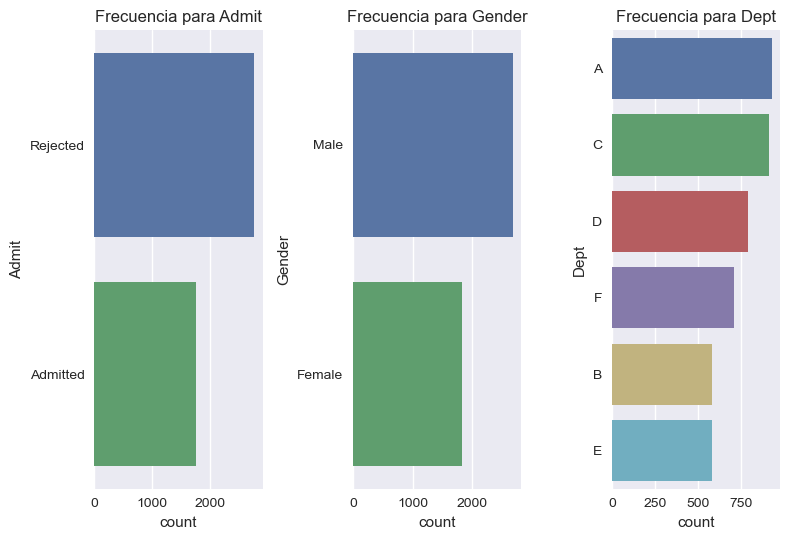

In [37]:
for i, columna in enumerate(df_deagg.columns):
    plt.subplot(1, 3, i + 1)
    sns.countplot(y=df_deagg[columna], order=df_deagg[columna].value_counts().index)
    plt.title(f'Frecuencia para {columna}')
    plt.tight_layout()

- La gran parte de los postulantes fue rechazado
- La gran partre de los postulantes fueron hombres
- La gran parte de los postulantes vino desde el departamenteo A y C

# Preprocesamiento de datos

Los datos estan en formato string, por lo tanto, se deben cambiar a numeros. El cambio con LabelEncoder solamente se puede hacer con variables binarias!. Variable que tengan 2 o mas clases, se debe hacer el Leave One Out Hot Encoding!

- LabelEncoder ordena por abecedario, y luego asigna el label numerico

In [38]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [39]:
lbl = LabelEncoder()

df_deagg['Gender'] = lbl.fit_transform(df_deagg['Gender'])
df_deagg['Admit'] = lbl.fit_transform(df_deagg['Admit'])

dummies_dept = pd.get_dummies(df_deagg['Dept'], drop_first=True, prefix='dept')
df_deagg = pd.concat([df_deagg, dummies_dept], axis=1)
df_deagg = df_deagg.drop(columns='Dept')

In [40]:
df_deagg.sample()

,Admit,Gender,dept_B,dept_C,dept_D,dept_E,dept_F
4065,1,1,0,0,0,0,1


In [41]:
X = df_deagg.drop(columns='Admit')
y = df_deagg['Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11238)

In [42]:
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)
y_hat_log_proba = nb_classifier.predict_log_proba(X_test)
y_hat_prob = nb_classifier.predict_proba(X_test)

In [43]:
y_hat_prob
# En esta matriz se ve la probabilidad de pertenecer a la clase 0 (Admitted) y a la clase 1 (Rejected)

array([[0.35766931, 0.64233069],
       [0.30891594, 0.69108406],
       [0.30891594, 0.69108406],
       ...,
       [0.08369993, 0.91630007],
       [0.28892279, 0.71107721],
       [0.04599833, 0.95400167]])

In [44]:
y_hat = nb_classifier.predict(X_test)

# Metricas

In [45]:
cnf = confusion_matrix(y_test, y_hat) / len(y_test)

<AxesSubplot:>

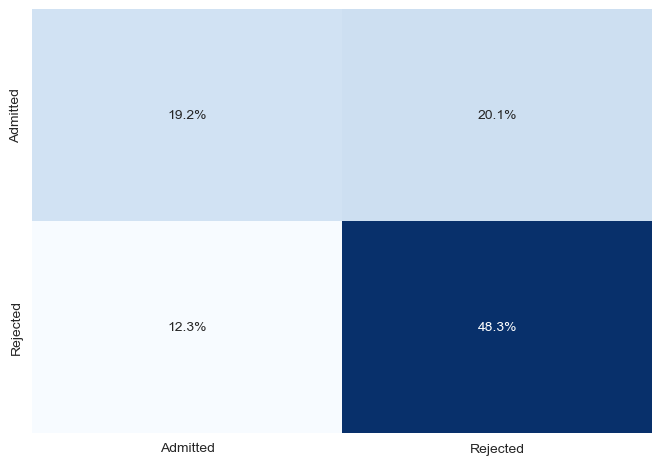

In [46]:
target_label = ['Admitted', 'Rejected']
sns.heatmap(cnf, annot=True, fmt='.1%', cbar=False, cmap='Blues', xticklabels=target_label,
            yticklabels=target_label)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54       588
           1       0.71      0.80      0.75       906

    accuracy                           0.68      1494
   macro avg       0.66      0.64      0.65      1494
weighted avg       0.67      0.68      0.67      1494



In [48]:
pr_1_nb = y_hat_prob[:, 1]

In [49]:
fpr, tpr, _ = roc_curve(y_test, pr_1_nb)
auc = round(roc_auc_score(y_test, pr_1_nb), 3)

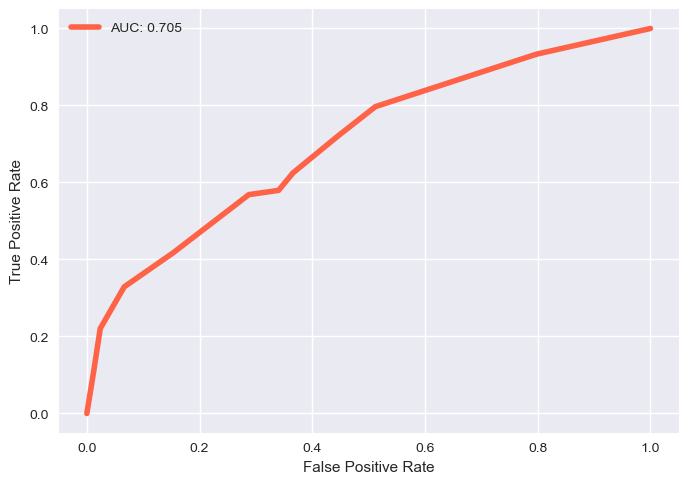

In [50]:
plt.plot(fpr, tpr, label=f'AUC: {auc}', color='tomato', lw=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

El modelo tiene un 20% mas de correcta clasificacion que un modelo aleatorio! Porque su AUC es 0.705
y es mayor que 0.5

# Informacion a priori

En este modelo se puede poner la probabilidad a priori de que ocurra nuestro evento. En modo default, BernolliNB calcula la probabilidad a priori basado en los datos. O sea, utiliza la frecuencia que se encuentra en los datos para cada clase!. En el caso anterior, se puede ver que las probabilidad a priori fueron:

In [51]:
np.exp(nb_classifier.class_log_prior_)

array([0.38489446, 0.61510554])

Por lo tanto, las probabilidades de ver a alguien Admitido fue del 38% y alguien rechazado del 61%. Esto se puede obtener tambien de la siguiente forma (mas o menos):

In [52]:
df_deagg['Admit'].value_counts('%')

1    0.61224
0    0.38776
Name: Admit, dtype: float64

Ahora, esto se ocupa para NO influir en el modelo en general. Sin embargo, yo puedo modificar las probabilidad a priori de cada una de las clases segun informacion!

In [53]:
priors = [0.39, 0.61]
afx.compare_priors(X_train, X_test, y_train, y_test, priors)

A priori: [0.39, 0.61]
Accuracy: 0.675
Recall: 0.797
Precision: 0.706
F1: 0.749
AUC: 0.705



In [54]:
priors = [0.5, 0.5]
afx.compare_priors(X_train, X_test, y_train, y_test, priors)

A priori: [0.5, 0.5]
Accuracy: 0.629
Recall: 0.625
Precision: 0.725
F1: 0.671
AUC: 0.705



In [55]:
# Ahora, en el sitio de la universidad esta disponible la tasa historica de aceptados/rechazados!
priors = [0.17, 0.83]
afx.compare_priors(X_train, X_test, y_train, y_test, priors)

# Esto mejora el desempeno general del modelo!

A priori: [0.17, 0.83]
Accuracy: 0.645
Recall: 0.935
Precision: 0.642
F1: 0.761
AUC: 0.705



# Ventajas y Desventajas

- Es intuitivo.
- Es poco complejo y es inmune al overfitting.


## Desventaja

- No toma en cuneta la relacion entre los atributos, por lo que puede obviar informacion obvia (valga la redundancia)